In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
df = pd.read_csv("../data/processed/processed_data.csv")
df.head()

,state_name,temperature_avg,temperature_range,dissolved_oxygen_avg,dissolved_oxygen_range,ph_avg,ph_range,log_fecal_coliform_avg,log_fecal_coliform_range,log_nitrate_avg,log_nitrate_range,log_conductivity_avg,log_conductivity_range,log_bod_avg,log_bod_range,WQI,WQI_Category
0,HIMACHAL PRADESH,13.0,22.0,8.50,1.4,7.70,1.0,3.120138,4.043051,0.521550,0.487836,5.088453,1.708693,1.014074,0.641854,81.040190,Excellent
1,HIMACHAL PRADESH,9.5,11.0,8.30,1.4,7.30,1.6,6.043957,2.668854,0.665972,0.776680,4.495096,0.835117,1.014074,0.641854,76.829889,Good
2,HIMACHAL PRADESH,9.5,11.0,8.30,1.0,7.25,1.1,6.043957,2.668854,0.505000,0.454736,4.439667,0.593064,1.014074,0.641854,76.651833,Good
3,HIMACHAL PRADESH,9.5,12.0,8.40,1.0,7.15,1.7,3.922512,1.574036,0.642795,0.730326,4.448773,0.956962,0.693147,0.000000,83.224285,Excellent
4,HIMACHAL PRADESH,9.5,11.0,8.45,1.3,7.40,0.8,3.986922,1.617737,0.477833,0.400402,4.343721,0.784955,0.693147,0.000000,85.960979,Excellent


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3575 entries, 0 to 3574
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   state_name                3575 non-null   object 
 1   temperature_avg           3575 non-null   float64
 2   temperature_range         3575 non-null   float64
 3   dissolved_oxygen_avg      3575 non-null   float64
 4   dissolved_oxygen_range    3575 non-null   float64
 5   ph_avg                    3575 non-null   float64
 6   ph_range                  3575 non-null   float64
 7   log_fecal_coliform_avg    3575 non-null   float64
 8   log_fecal_coliform_range  3575 non-null   float64
 9   log_nitrate_avg           3575 non-null   float64
 10  log_nitrate_range         3575 non-null   float64
 11  log_conductivity_avg      3575 non-null   float64
 12  log_conductivity_range    3575 non-null   float64
 13  log_bod_avg               3575 non-null   float64
 14  log_bod_

In [4]:
print(df.describe())

       temperature_avg  temperature_range  dissolved_oxygen_avg  \
count      3575.000000        3575.000000           3575.000000   
mean         24.470685           7.995497              6.038979   
std           4.087173           5.160598              2.001329   
min           9.500000           0.000000              0.300000   
25%          22.500000           4.000000              5.150000   
50%          25.000000           7.000000              6.400000   
75%          27.000000          11.500000              7.400000   
max          31.500000          22.000000              9.800000   

       dissolved_oxygen_range       ph_avg     ph_range  \
count             3575.000000  3575.000000  3575.000000   
mean                 2.464112     7.563631     0.972660   
std                  1.875239     0.421820     0.504469   
min                  0.000000     6.387000     0.000000   
25%                  1.100000     7.300000     0.600000   
50%                  1.900000     7.600000

In [5]:
# Separate features and target
from sklearn.calibration import LabelEncoder


X = df.drop(columns=['WQI', 'WQI_Category'])
y = df['WQI']

# Encode the 'state_name' column
encoder = LabelEncoder()
X['state_name'] = encoder.fit_transform(X['state_name'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [9]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.001),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(n_estimators=300, learning_rate=0.05, random_state=42),
    "SVR": SVR(kernel='rbf'),
    "KNN": KNeighborsRegressor(n_neighbors=5)
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    results.append({
        "Model": name,
        "MAE": mae,
        "RMSE": rmse,
        "R²": r2
    })

results_df = pd.DataFrame(results).sort_values(by="R²", ascending=False)
print(results_df)

               Model       MAE      RMSE        R²
6            XGBoost  1.074998  1.469811  0.990505
5  Gradient Boosting  1.349346  1.776652  0.986126
4      Random Forest  1.719708  2.307377  0.976599
1   Ridge Regression  1.977484  2.533819  0.971781
2   Lasso Regression  1.977737  2.533922  0.971779
0  Linear Regression  1.977635  2.533980  0.971777
7                SVR  2.613560  3.402168  0.949125
3      Decision Tree  2.873797  3.843043  0.935085
8                KNN  2.844953  3.914724  0.932641


/var/folders/k0/2c799j9560s888j2d6zgzyrm0000gn/T/ipykernel_1345/3765107318.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='R²', y='Model', data=results_df, palette='viridis')


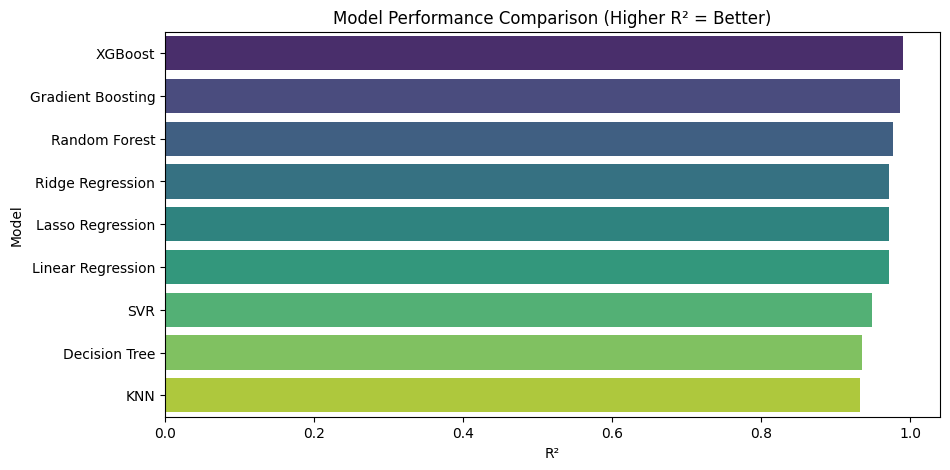

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.barplot(x='R²', y='Model', data=results_df, palette='viridis')
plt.title("Model Performance Comparison (Higher R² = Better)")
plt.show()

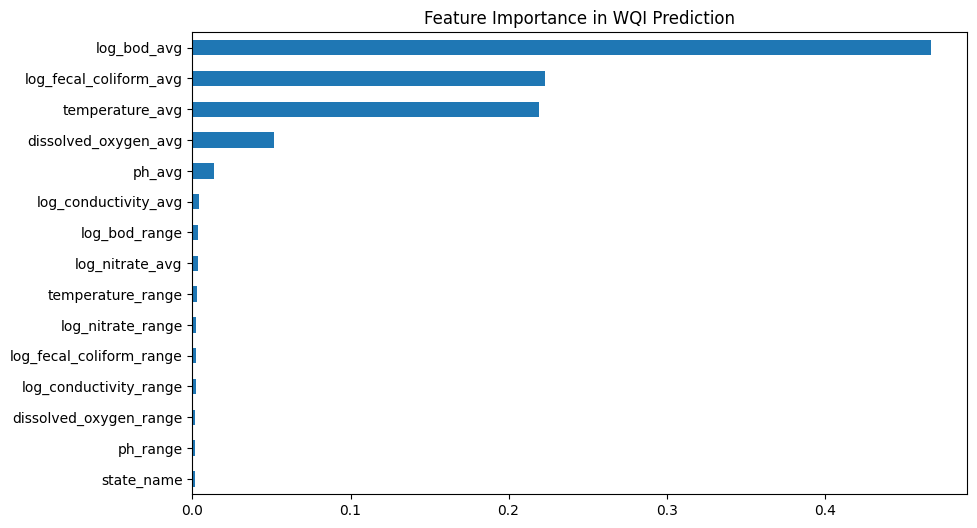

In [8]:
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=True).plot(kind='barh', figsize=(10,6))
plt.title("Feature Importance in WQI Prediction")
plt.show()

/var/folders/k0/2c799j9560s888j2d6zgzyrm0000gn/T/ipykernel_1345/739181812.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance, y=feature_importance.index, palette='viridis')


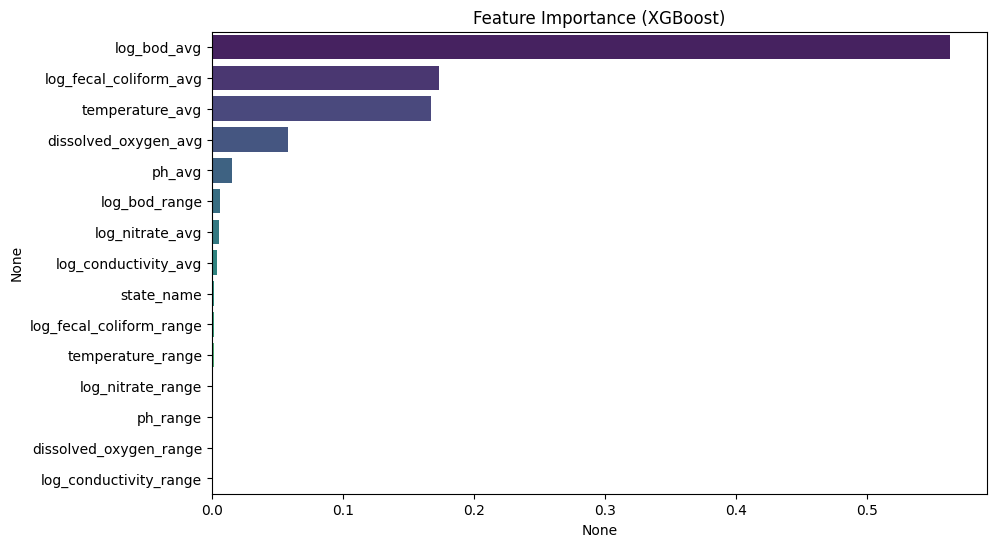

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

xgb_model = models["XGBoost"]
feature_importance = pd.Series(xgb_model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feature_importance, y=feature_importance.index, palette='viridis')
plt.title("Feature Importance (XGBoost)")
plt.show()

In [19]:
import joblib

# Save model
joblib.dump(models["XGBoost"], "../models/water_quality_model.pkl")

# Load model later
loaded_model = joblib.load("../models/water_quality_model.pkl")